In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [3]:
df1=pd.read_csv(r'C:\Users\DELL\Desktop\python projects\Spark Funds Industrial Assignment - IP1\Spark Funds Industrial Assignment - 1\companies.txt',delimiter="\t")
df2=pd.read_csv(r'C:\Users\DELL\Desktop\python projects\Spark Funds Industrial Assignment - IP1\Spark Funds Industrial Assignment - 1\rounds2.csv')

In [4]:
df1.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [5]:
df2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
df1['name'].nunique()

66102

In [7]:
df2['company_permalink'].nunique()

90247

In [8]:
df1.describe()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/Organization/Chumbak,Spire,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [9]:
#How many companies are present in rounds2
df2['company_permalink']=df2['company_permalink'].str.lower()
print(len(df2['company_permalink'].unique()))
df2['company_permalink'].str.lower().describe()

66373


count                       114949
unique                       66373
top       /organization/solarflare
freq                            19
Name: company_permalink, dtype: object

In [10]:
#How many companies are present in companies
df1['permalink']=df1['permalink'].str.lower()
print(len(df1['permalink'].unique()))
df1['permalink'].str.lower().describe()

66368


count                      66368
unique                     66368
top       /organization/bridgefy
freq                           1
Name: permalink, dtype: object

In [11]:
# Are there any companies in rounds 2 file which are not present in df1
c1=pd.DataFrame(df2.company_permalink.unique())
c2=pd.DataFrame(df1.permalink.unique())
c2.equals(c1)

False

In [12]:
master=pd.merge(df2,df1,how='left',left_on='company_permalink',right_on='permalink',suffixes=('_abc','_xyz'))

In [13]:
len(master.index)

114949

In [14]:
master.funding_round_type.value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

In [15]:
# four investment types
master=master[(master['funding_round_type'] == 'venture')
              |(master['funding_round_type'] == 'seed')
             |(master['funding_round_type'] == 'angel')
            | (master['funding_round_type'] == 'private_equity ')]
master.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


In [16]:
# calculating average investment
round(master.groupby('funding_round_type').raised_amount_usd.mean(),2)

funding_round_type
angel        958694.47
seed         719818.00
venture    11748949.13
Name: raised_amount_usd, dtype: float64

In [17]:
master=master[master['funding_round_type']=='venture']

<AxesSubplot:xlabel='funding_round_type', ylabel='count'>

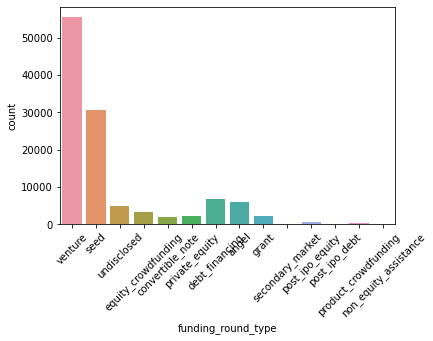

In [18]:
plt.xticks(rotation=45)
sb.countplot(data=df2,x='funding_round_type')

In [19]:
top9=master.pivot_table(values='raised_amount_usd',index='country_code',aggfunc='sum')
top9=top9.sort_values(by='raised_amount_usd',ascending=False)
top9=top9.iloc[:9,]
top9

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [22]:
lst=pd.read_html(r'https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')

URLError: <urlopen error [Errno 11001] getaddrinfo failed>

In [ ]:
table1=lst[0]
table1.head()

In [ ]:
table2=lst[1]
table2.head()

In [ ]:
table1=table1['Alpha-3 code']

In [ ]:
table1=pd.DataFrame(table1)
table1

In [ ]:
table2=table2['Alpha-3 code']
table2=pd.DataFrame(table2)
table2

In [ ]:
final_table=pd.concat([table1,table2],axis=0)
final_table.reset_index(drop=True,inplace=True)
final_table.head(10)

In [ ]:
final_table.to_csv("d:\\english_speaking_countries.csv",index=False)

In [ ]:
# only english speaking countries
master=master[(master['country_code']=='USA')
             |(master['country_code']=='IND')
             |(master['country_code']=='GBR')]
master.head()

In [ ]:
master['category_list']=master['category_list'].astype(str)
master['category_list']=master['category_list'].apply(lambda x : x.split("|")[0])

In [ ]:
df5=pd.read_csv(r'C:\Users\DELL\Desktop\python projects\Spark Funds Industrial Assignment - IP1\Spark Funds Industrial Assignment - 1\mapping.csv')

In [ ]:
df5.head()

In [ ]:

#df5['category_list']=df5['category_list'].fillna(df5.mean()['category_list'])
#df5['category_list']=df5['category_list'].fillna("")
#df5['category_list']=df5['category_list'].astype(str)
#df5['category_list']=df5['category_list'].dropna()
#df6 = df5.add(IPL_2017,filtl_value=0)

In [ ]:
#df5['primary_sector']=df5['category_list'].apply(lambda x:x.split("|")[0])
#df['primary']=" ".join([i[0].upper( ) for i in df5['category_list'].split()])

In [ ]:
df5.category_list=df5.category_list.replace({'0':'na','2.na':'2.0'},regex=True)
df5.head()

In [ ]:
#merging
df5=pd.melt(df5,id_vars=['category_list'],value_vars=['Manufacturing',
                                                      'Automotive & Sports',
                                                      'Cleantech / Semiconductors',
                                                      'Entertainment',
                                                      'Health',
                                                      'News, Search and Messaging',
                                                      'Others',
                                                      'Social, Finance, Analytics, Advertising'])
df5=df5[~(df5.value==0)]
df5=df5.drop('value',axis=1)
df5=df5.rename(columns={"variable":"Main_sector"})
df5.head()

In [ ]:
df5['Main_sector'].str.lower()

In [ ]:
master=master.merge(df5,how='left',on='category_list')
master.head()

In [ ]:
#main sector rows
master=master[~(master.Main_sector.isnull())]
len(master.index)

# Sector Analysis

In [ ]:
D1_temp = master.loc[(master.country_code=="USA") & 
                  (master.funding_round_type=="venture") & 
                  (master.raised_amount_usd >=5000000) & (master.raised_amount_usd <= 15000000), :]

#Total amount invested in each main sector in a separate column
D1_total_sum_investments = D1_temp.groupby("Main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='Total_Sum_Invested')

#Total number (or count) of investments for each main sector in a separate column
D1_total_count_investments = D1_temp.groupby("Main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='Counter')

# Merging frames to created final D1
D1_temp= pd.merge(D1_temp,D1_total_count_investments,how='inner',on='Main_sector')
D1 = pd.merge(D1_temp,D1_total_sum_investments,how='inner',on='Main_sector')

D1.head(5)

In [ ]:
#D1 = master[(master['country_code']=='USA')&(master['raised_amount_usd'] >= 5)&(master['raised_amount_usd'] <= 15)]
#D1_all = D1[['raised_amount_usd','Main_sector']].groupby('Main_sector').agg(['sum','count'])
#D1 = D1.merge(D1_all,on='Main_sector')
#D1.head()

In [ ]:
D2_temp = master.loc[(master.country_code=="GBR") & 
                  (master.funding_round_type=="venture") & 
                  (master.raised_amount_usd >=5000000) & (master.raised_amount_usd <= 15000000), :]

#Total amount invested in each main sector in a separate column
D2_total_sum_investments = D2_temp.groupby("Main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='Total_Sum_Invested')

#Total number (or count) of investments for each main sector in a separate column
D2_total_count_investments = D2_temp.groupby("Main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='Counter')

# Merging frames to created final D1
D2_temp= pd.merge(D2_temp,D2_total_count_investments,how='inner',on='Main_sector')
D2 = pd.merge(D2_temp,D2_total_sum_investments,how='inner',on='Main_sector')

D2.head()

In [ ]:
D3_temp = master.loc[(master.country_code=="IND") & 
                  (master.funding_round_type=="venture") & 
                  (master.raised_amount_usd >=5000000) & (master.raised_amount_usd <= 15000000), :]

#Total amount invested in each main sector in a separate column
D3_total_sum_investments = D3_temp.groupby("Main_sector").raised_amount_usd.sum().sort_values(ascending = False).to_frame(name='Total_Sum_Invested')

#Total number (or count) of investments for each main sector in a separate column
D3_total_count_investments = D3_temp.groupby("Main_sector").raised_amount_usd.count().sort_values(ascending = False).to_frame(name='Counter')

# Merging frames to created final D1
D3_temp= pd.merge(D3_temp,D3_total_count_investments,how='inner',on='Main_sector')
D3 = pd.merge(D3_temp,D1_total_sum_investments,how='inner',on='Main_sector')

D3.head(5)

In [ ]:
print(D1.raised_amount_usd.count())
print(D2.raised_amount_usd.count())
print(D3.raised_amount_usd.count())

In [ ]:
print(round(D1.raised_amount_usd.sum(), 2))
print(round(D2.raised_amount_usd.sum(), 2))
print(round(D3.raised_amount_usd.sum(), 2))

In [23]:
# TOP sECTOR
D1_temp

NameError: name 'D1_temp' is not defined

In [ ]:
# Second TOP SECTOR
D2_temp

In [ ]:
# Third top sector
D3_temp

In [ ]:
plt.xticks(rotation=45)
sb.countplot(data=df2,x='funding_round_type')